### Notes

* This is the only state where only the Ansolabehere/Rodden data are used:
  https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/16797

In [1]:
import sys; sys.path.insert(0,'../')
from dist_tools import *

%matplotlib inline

usps = seats, fips, epsg = 13, 12, 3513
years = [2008]
cols = ["D08", "R08"]

In [2]:
! ls /media/jsaxon/brobdingnag/data/el_dv/fl/

fl_final.dbf  fl_final.sbx  fl_final.tab       FL_Shapefile.zip
fl_final.prj  fl_final.shp  FL_notes_0927.rtf  MANIFEST.TXT
fl_final.sbn  fl_final.shx  fl_proj.qqs.qgs


In [3]:
votes = gpd.read_file("/media/jsaxon/brobdingnag/data/el_dv/fl/fl_final.shp").to_crs(epsg = epsg)
votes.rename(columns = {"PRES_DEM_0" : "D08", "PRES_REP_0" : "R08"}, inplace = True)
votes = votes[["D08", "R08", "geometry"]]

votes["DFrac"] = votes["D08"] / (votes["D08"] + votes["R08"])
output_geojson(votes.set_geometry(votes.geometry.simplify(10)), var = "DFrac", fname = "mapped/fl_2008.geojson")

In [4]:
tr_rn = get_tr_rn("FL").to_crs(epsg = epsg)

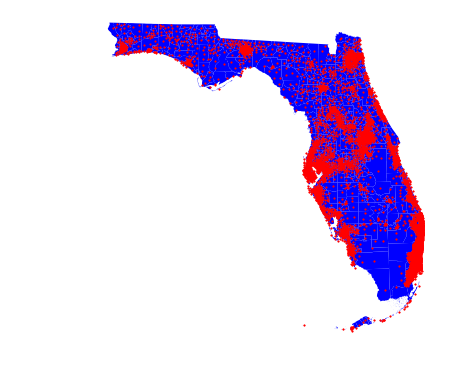

In [5]:
ax = tr_rn.plot(color = "blue", markersize = 3, figsize = (3, 3))
votes.centroid.plot(color = "red", markersize = 0.5, ax = ax)
ax.set_axis_off()

In [6]:
votes_merged = merge_tract_number(tr_rn, votes)
votes_merged.to_csv("votes/fl.csv", index = True)

### Sanity plot: cities are blue...

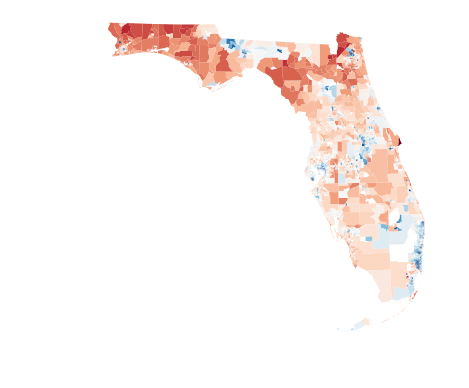

In [7]:
map_sanity_check("fl", 2008, epsg)